# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('chained_assignment',None)

# Import data

In [2]:
fpath_listings_detailed = '../SanDiego/listings_detailed.csv'

list_df = pd.read_csv(fpath_listings_detailed)
print list_df.shape

(6608, 95)


# Designate Features

In [27]:
features = ['price','property_type','room_type','accommodates','bathrooms',
            'bedrooms','beds','neighbourhood_cleansed','latitude','longitude',
            'amenities']

pre_df = list_df[features]
pre_df.head()

,price,property_type,room_type,accommodates,bathrooms,bedrooms,beds,neighbourhood_cleansed,latitude,longitude,amenities
0,$49.00,House,Private room,2,1.0,1.0,1.0,Amphitheater And Water Park,32.581882,-117.001940,"{TV,""Wireless Internet"",Heating,""Family/Kid Fr..."
1,$59.00,Condominium,Private room,2,1.0,1.0,1.0,East Lake,32.653029,-116.976812,"{Internet,""Wireless Internet"",""Air Conditionin..."
2,$150.00,Condominium,Entire home/apt,6,2.5,3.0,3.0,East Lake,32.661477,-116.971813,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."
3,$120.00,Townhouse,Entire home/apt,4,1.5,2.0,3.0,Eastlake Trails,32.638694,-116.951252,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
4,$70.00,House,Private room,2,1.0,1.0,1.0,Eastlake Vistas,32.638942,-116.938891,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po..."


# Clean Up Features

In [34]:
# amenities cleaning
for entry in pre_df['amenities']:
    print entry

{TV,"Wireless Internet",Heating,"Family/Kid Friendly","Smoke Detector","Carbon Monoxide Detector","First Aid Kit",Essentials,Shampoo}
{Internet,"Wireless Internet","Air Conditioning",Pool,Heating,"Smoke Detector","Carbon Monoxide Detector","Safety Card","Fire Extinguisher",Essentials,Shampoo,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}
{TV,"Cable TV","Wireless Internet","Air Conditioning",Pool,Kitchen,"Free Parking on Premises","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials}
{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Indoor Fireplace","Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,Breakfast,"Indoor Fireplace",Heating,"Family/Kid Friendly","Suitable for Events",Washer,Dryer,"Smo

{TV,"Wireless Internet","Free Parking on Premises",Breakfast,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Shampoo,"Lock on Bedroom Door",Hangers,"Hair Dryer","translation missing: en.hosting_amenity_49"}
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Pool,Kitchen,"Free Parking on Premises",Gym,Breakfast,"Hot Tub",Heating,"Suitable for Events",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Shampoo,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}
{TV,"Cable TV","Wireless Internet","Free Parking on Premises","Smoke Detector"}
{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Gym,"Elevator in Building",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector"}
{TV,Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises","Pets Allowed","Hot Tub","Indo

{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Pool,Kitchen,"Free Parking on Premises","Smoking Allowed",Doorman,Gym,"Elevator in Building","Hot Tub","Indoor Fireplace","Buzzer/Wireless Intercom",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,"24-Hour Check-in","Hair Dryer",Iron,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}
{TV,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly",Washer,Dryer,Essentials,Shampoo,Hangers}
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Pool,Kitchen,"Free Parking on Premises",Gym,"Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit",Essentials,Shampoo,"Lock on Bedroom Door","24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}
{TV,Internet,"Wireless Internet","Air Conditioning","Wheelchair Acce

{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises","Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials}
{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector"}
{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}
{"Cable TV",Internet,"Wireless Internet",Kitchen,"Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher"}
{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Family/Kid Friendly",Washer,Dryer,Essentials,Hangers}
{TV,"Cable TV",Internet,"Wireless Internet","Wheelchair Accessible",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Fri

{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Fire Extinguisher",Essentials,Shampoo,Hangers,"Hair Dryer",Iron}
{TV,"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises","Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials}
{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}
{TV,Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Hot Tub",Heating,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}
{TV,Internet,"Wireless Internet",Kitchen,"Pets Allowed","Pet

In [ ]:
    print type(pre_df['amenities'][i])
    amenities_str = pre_df['amenities'][i].replace('"','').replace('{','').replace('}','')
    print amenities_str.split(',')
    
    print ''

In [15]:
def price_to_float(x):
    x = x.replace('$','')
    x = x.replace(',','')
    return float(x)

pre_df['price'] = pre_df['price'].apply(price_to_float)
pre_df = pd.get_dummies(pre_df)

print pre_df.shape
pre_df.head()

AttributeError: 'float' object has no attribute 'replace'

In [5]:
pre_df.dropna(inplace=True)
print pre_df.shape
pre_df.head()

(6593, 127)


,price,accommodates,bathrooms,bedrooms,beds,latitude,longitude,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,...,neighbourhood_cleansed_Thomy Locust Pl,neighbourhood_cleansed_Tierrasanta,neighbourhood_cleansed_Tijuana River Valley,neighbourhood_cleansed_Torrey Pines,neighbourhood_cleansed_University City,neighbourhood_cleansed_Valencia Park,neighbourhood_cleansed_Webster,neighbourhood_cleansed_West University Heights,neighbourhood_cleansed_Wooded Area,neighbourhood_cleansed_Yosemite Dr
0,49.0,2,1.0,1.0,1.0,32.581882,-117.001940,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,59.0,2,1.0,1.0,1.0,32.653029,-116.976812,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150.0,6,2.5,3.0,3.0,32.661477,-116.971813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120.0,4,1.5,2.0,3.0,32.638694,-116.951252,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70.0,2,1.0,1.0,1.0,32.638942,-116.938891,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scikit Learn

In [6]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Shuffle - Train/Validation/Test split

In [7]:
# shuffle
train_df, validate_df, test_df = np.split(pre_df.sample(frac=1, random_state=1),
                                          [int(.6*len(pre_df)), int(.8*len(pre_df))])
print train_df.shape
print validate_df.shape
print test_df.shape

(3955, 127)
(1319, 127)
(1319, 127)


In [8]:
cols = list(pre_df.columns)
target = 'price'
features = [col for col in cols if col != target]
#print cols
#print target
#print features

In [9]:
X = train_df[features]
y = np.ravel(train_df[target])
print X.shape
print y.shape

(3955, 126)
(3955,)


# Simple Random Forest Classifier

0.672871933311


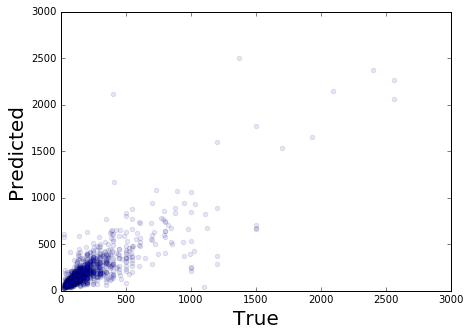

In [10]:
X_train = train_df[features]
y_train = np.ravel(train_df[target])
X_test = test_df[features]
y_test = np.ravel(test_df[target])

model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
y_prediction = model.fit(X_train, y_train).predict(X_test)
r2 = r2_score(y_test, y_prediction)
print r2

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(y_test, y_prediction, alpha=0.1)
ax.set_xlabel('True',fontsize=20)
ax.set_ylabel('Predicted',fontsize=20)
ax.set_xlim([0,3000])
ax.set_ylim([0,3000])
plt.show()

# Cross Validation

In [11]:
kf = KFold(y, n_folds=folds)

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    mod_prediction = model.fit(X_train, Y_train).predict(X_test)

NameError: name 'folds' is not defined

# Model